In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('Housing.csv')

# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1754318687330.6643
R2 Score: 0.6529242642153184


Dataset Shape: (545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

MSE: 1754318687330.6643
R2 Score: 0.6529242642153184


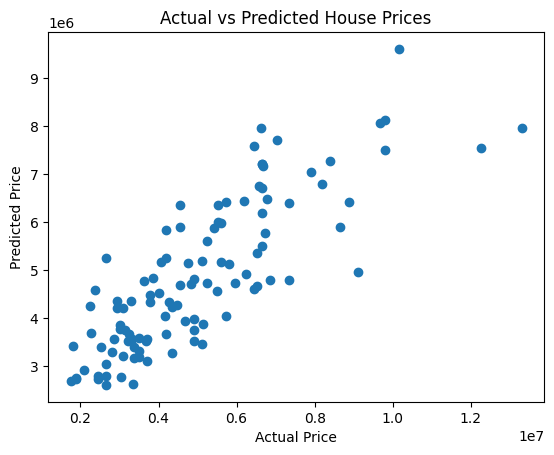

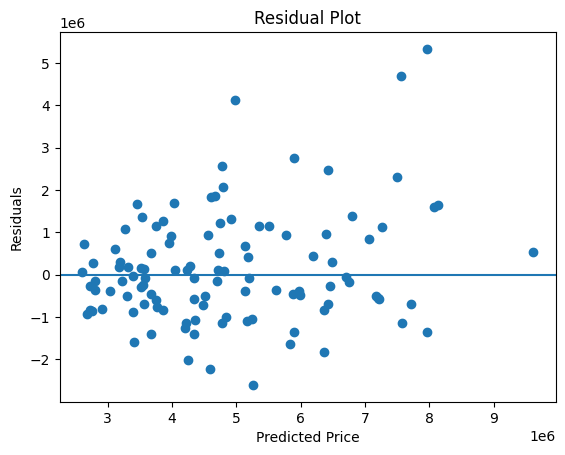

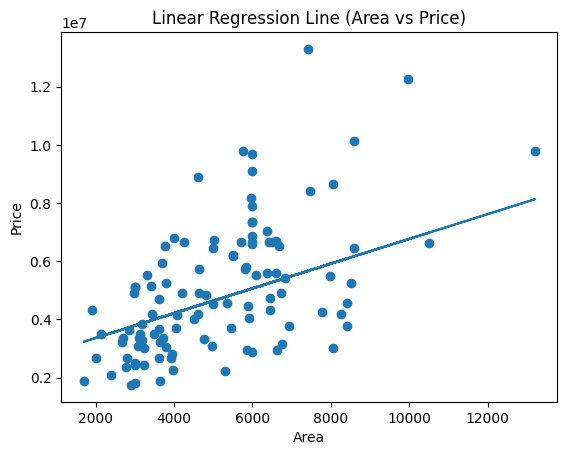

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Dataset
df = pd.read_csv("Housing.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# 2. Encode Categorical Columns
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Features & Target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 4. Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMSE:", mse)
print("R2 Score:", r2)

# 8. Plot 1 — Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# 9. Plot 2 — Residual Plot
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0)
plt.show()

# 10. Plot 3 — Single Feature Line (Area vs Price)
if 'area' in df.columns:
    X_area = df[['area']]
    y_area = df['price']

    Xtr, Xte, ytr, yte = train_test_split(X_area, y_area, test_size=0.2, random_state=42)

    m2 = LinearRegression()
    m2.fit(Xtr, ytr)

    y_line = m2.predict(Xte)

    plt.figure()
    plt.scatter(Xte, yte)
    plt.plot(Xte, y_line)
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title("Linear Regression Line (Area vs Price)")
    plt.show()
